
Datasets: Iris, Breast cancer, Wine 5 Linkages Abordagens: Topdown, bottom up https://www.kaggle.com/vipulgandhi/hierarchical-clustering-explanation

https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

1) Tipos de abordagens(Topdown, bottom up)

2) Diferentes tipos de linkage

3) Casos de uso com as combinação de linkage e abordagens, mostrando a qualidade de cada um

Aplicar os clusters a dados já anotados, comparando com o dendograma

In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import datasets
from sklearn import metrics
import seaborn as sns

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize
from sklearn.metrics import adjusted_rand_score
from scipy.cluster.hierarchy import cophenet
from sklearn import preprocessing
import scipy.cluster.hierarchy as sch

# Hierarchical Clustering of Iris Data


In [242]:
# load the iris dataset
iris = datasets.load_iris()
print(iris.data.shape)

(150, 4)


In [243]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [244]:
# Loading dataset
iris = datasets.load_iris() # this dataset is present in the scikit-learn distribution

# separate the data from the target attributes
data = iris.data
target = iris.target

# normalize the data attributes
normalized_data = preprocessing.normalize(data)

df_iris = pd.DataFrame(normalized_data, columns=iris.feature_names)
df_iris['target'] = target

In [245]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0
5,0.784175,0.566349,0.246870,0.058087,0
6,0.780109,0.576603,0.237425,0.050877,0
7,0.802185,0.545486,0.240655,0.032087,0
8,0.806424,0.531507,0.256589,0.036656,0
9,0.818031,0.517530,0.250418,0.016695,0


#### iris.target contains the labels that indicate which type of Iris flower each sample is

In [246]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## The dataset contains labeled data where sepal-length, sepal-width and petal-length, petal-width of each plant is available. We will use the four attributes of the plants to cluster them into three different groups.

#### Let’s see how the dataset looks like:

In [247]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0


#### You can see that our dataset contains numerical values for the attributes.

#### Clustering is an unsupervised technique, therefore we do not require labels in our dataset. The following script removes the “target” column that contains labels, from the dataset.

In [248]:
# Remove the grain species from the DataFrame, save for later
species = list(df_iris.pop('target'))

In [249]:
species

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

### Observe que a coluna target foi removida

In [250]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
5,0.784175,0.566349,0.246870,0.058087
6,0.780109,0.576603,0.237425,0.050877
7,0.802185,0.545486,0.240655,0.032087
8,0.806424,0.531507,0.256589,0.036656
9,0.818031,0.517530,0.250418,0.016695


#### Let’s now see how our dataset looks like:

In [251]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639


# Linkage Methods

Initially, hierarchical clustering starts out with clusters consisting of individual points. 

Later, it compares clusters with each other and merges the two "closest" clusters.

Since clusters are sets of points, there are many different kinds of linkage methods:

- single linkage: cluster distance = smallest pairwise distance
- complete linkage: cluster distance = largest pairwise distance
- average linkage: cluster distance = average pairwise distance

## Single Linkage

Single Linkage:

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with unusual structure

In [252]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='single')

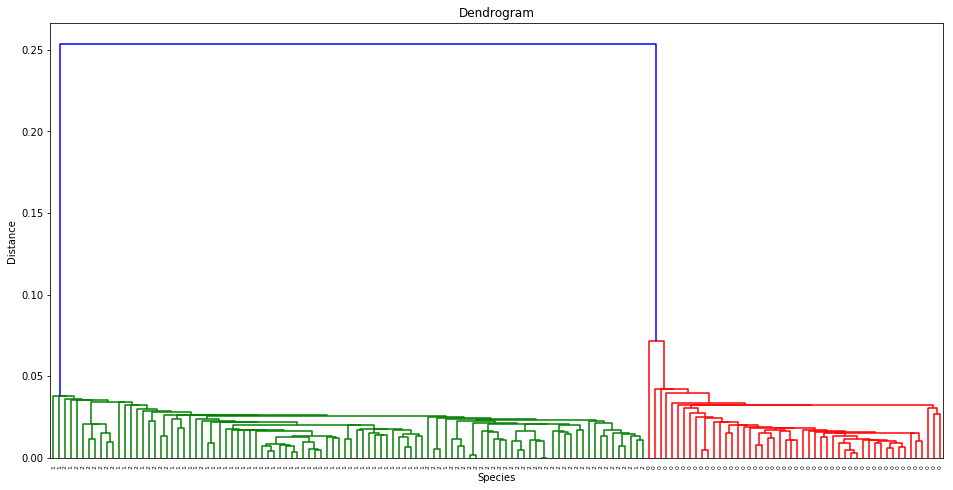

In [253]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()


## Complete Linkage

Complete Linkage:

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage

In [254]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='complete')

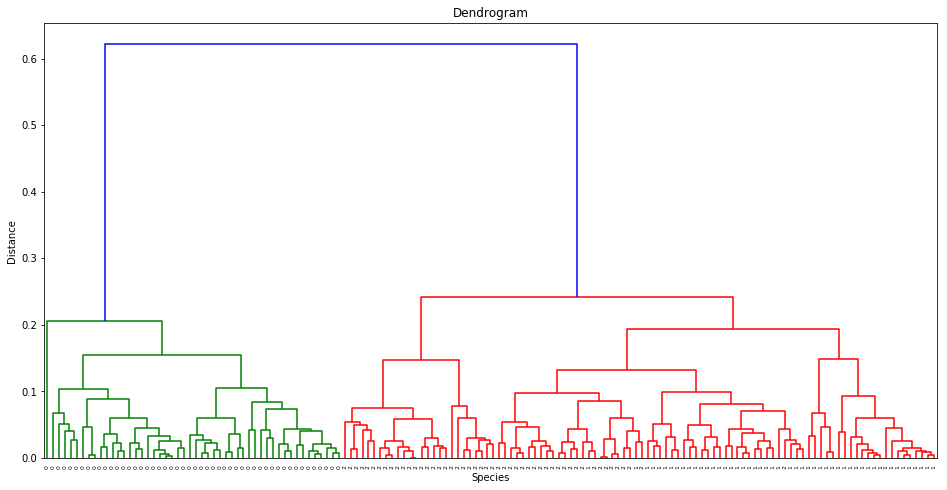

In [255]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Average Linkage

Average Linkage:

- cluster distance is the average distance of all pairs of points in clusters 1 and 2

In [256]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='average')

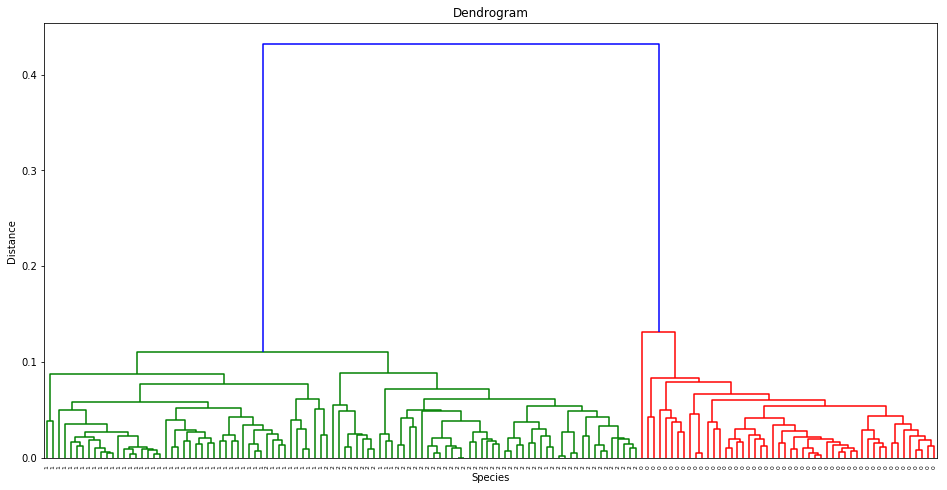

In [257]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Centroid Linkage

Average Linkage:

- cluster distance is the distance of the centroids of both clusters

In [258]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='centroid')

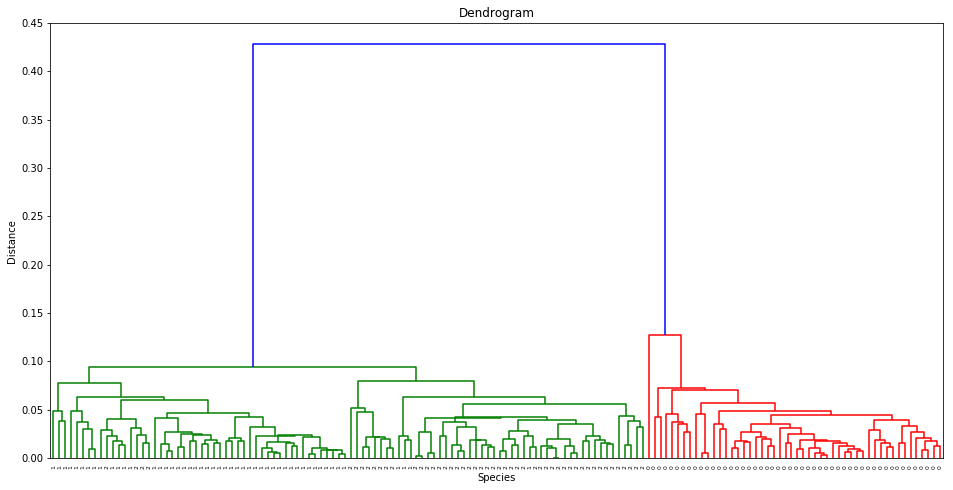

In [259]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
dendrogram = sch.dendrogram(mergings,
           labels=species,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Ward Linkage

Ward linkage:

- based on minimizing a variance criterion before and after merging

In [260]:
mergings = sch.linkage(df_iris.values, metric='euclidean', method='ward')

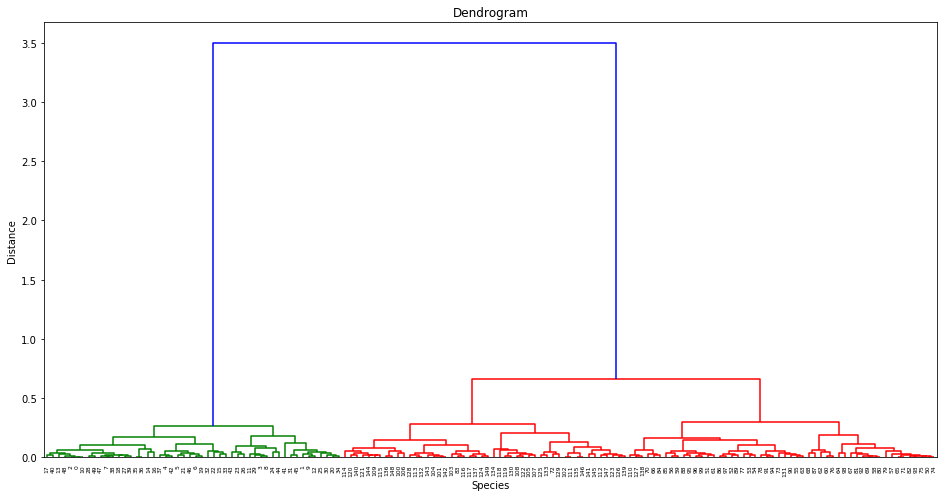

In [261]:
plt.figure(figsize=(16,8))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Distance')
plt.axhline(y=300, color='r', linestyle='--')
dendrogram = sch.dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=6,
           )
plt.show()

## Clusters using agglomerative clustering (bottom-up)

#### Let’s now divide our data into three clusters:

In [262]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

#### We have three clusters as this line cuts the dendrogram at three points. Let’s now apply hierarchical clustering for 3 clusters:

In [275]:
cluster.fit_predict(df_iris)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

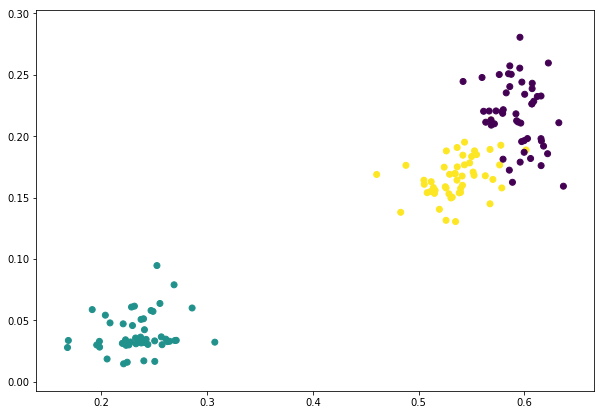

In [313]:
plt.figure(figsize=(10, 7)) 
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=cluster.labels_) 

In [270]:
df_iris['target'] = target


In [303]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.803773,0.551609,0.220644,0.031521,0
1,0.828133,0.507020,0.236609,0.033801,0
2,0.805333,0.548312,0.222752,0.034269,0
3,0.800030,0.539151,0.260879,0.034784,0
4,0.790965,0.569495,0.221470,0.031639,0
5,0.784175,0.566349,0.246870,0.058087,0
6,0.780109,0.576603,0.237425,0.050877,0
7,0.802185,0.545486,0.240655,0.032087,0
8,0.806424,0.531507,0.256589,0.036656,0
9,0.818031,0.517530,0.250418,0.016695,0


## Comparing with original dataset labels


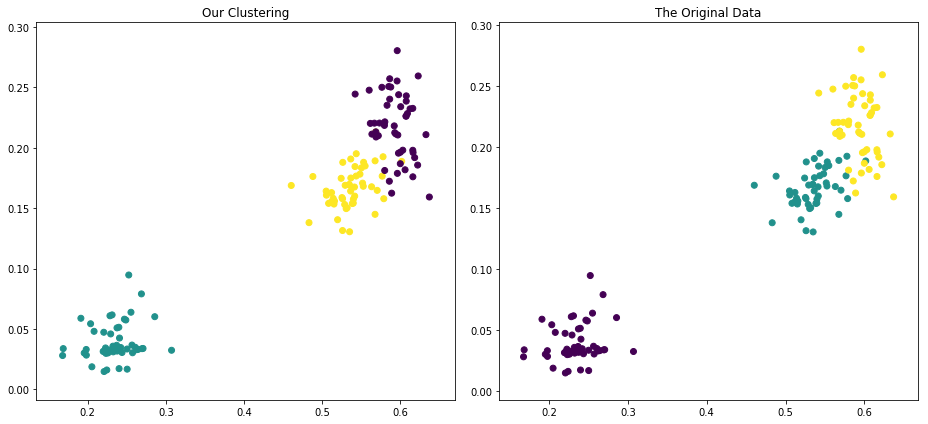

In [357]:
#this first plot based on the clusters that our model predicted
plt.figure(figsize=(13,6))
plt.subplot(121)
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=cluster.labels_) 
plt.title('Our Clustering')
plt.tight_layout()


#this second plot based on the clusters that our original dataset
plt.subplot(122)
df_iris['target'] = target
plt.scatter(df_iris['petal length (cm)'], df_iris['petal width (cm)'], c=df_iris.target)
plt.title('The Original Data')
plt.tight_layout()
plt.show()

## Evaluation with respect to the Linked method


In [179]:
from sklearn.metrics import adjusted_rand_score

In [180]:
single = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='single')
single_pred =  single.fit_predict(df_iris)

complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
complete_pred =  complete.fit_predict(df_iris)

average = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
average_pred =  average.fit_predict(df_iris)

#centroid = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='centroid')
#centroid_pred = centroid.fit_predict(df_iris)

ward = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ward_pred =  ward.fit_predict(df_iris)

#### To determine which clustering result better matches the original labels of the samples, we can use:
 - adjusted_rand_score which is an external cluster validation index which results in a score between -1 and 1, where 1 means two clusterings are identical of how they grouped the samples in a dataset (regardless of what label is assigned to each cluster).



In [181]:

ward_ar_score = adjusted_rand_score(species, ward_pred)

complete_ar_score = adjusted_rand_score(species, complete_pred)

avg_ar_score = adjusted_rand_score(species, average_pred)

#centroid_ar_score = adjusted_rand_score(species, centroid_pred)

single_ar_score = adjusted_rand_score(species, single_pred)

print( "Scores: \nWard:", ward_ar_score,"\nComplete: ", complete_ar_score, "\nAverage: ", avg_ar_score)

Scores: 
Ward: 0.8856970310281228 
Complete:  0.644447235392006 
Average:  0.5583714437541352
